# Github Languages Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
issues_df = pd.read_csv('/kaggle/input/github-programming-languages-data/issues.csv')
prs_df = pd.read_csv('/kaggle/input/github-programming-languages-data/prs.csv')
repos_df = pd.read_csv('/kaggle/input/github-programming-languages-data/repos.csv')

## Data Exporaltion

In [3]:
issues_df.head(5)

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [4]:
issues_df.describe()

,year,quarter,count
count,3375.000000,3375.000000,3375.000000
mean,2016.833481,2.510222,9210.374815
std,2.574464,1.119345,28680.099075
min,2011.000000,1.000000,100.000000
25%,2015.000000,2.000000,222.500000
50%,2017.000000,3.000000,567.000000
75%,2019.000000,4.000000,2989.500000
max,2022.000000,4.000000,341480.000000


In [5]:
prs_df.head(5)

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [6]:
prs_df.describe()

,year,quarter,count
count,3462.000000,3462.000000,3462.000000
mean,2017.013576,2.502022,11131.740901
std,2.552447,1.122835,34686.780996
min,2011.000000,1.000000,100.000000
25%,2015.000000,1.000000,230.000000
50%,2017.000000,2.000000,616.500000
75%,2019.000000,4.000000,3380.500000
max,2022.000000,4.000000,397530.000000


In [7]:
repos_df.head(5)

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


In [8]:
repos_df.describe()

,num_repos
count,4.530000e+02
mean,1.724180e+04
std,9.147605e+04
min,1.000000e+00
25%,3.700000e+01
50%,2.640000e+02
75%,2.563000e+03
max,1.100421e+06


In [9]:
repos_df[repos_df['language'] == "Jupyter Notebook"]

,language,num_repos
41,Jupyter Notebook,16898


## Data Visualizations

In [10]:
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='language'>

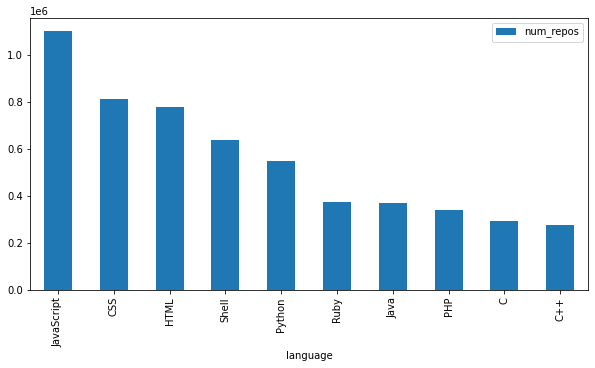

In [11]:
top_10_repos = repos_df.sort_values(by='num_repos', ascending=False)[:10]
top_10_repos.plot(kind='bar', x='language', figsize=(10, 5))

### PRs Over a Year

In [12]:
prs_2021 = prs_df[(prs_df['year'] == 2021) & (prs_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

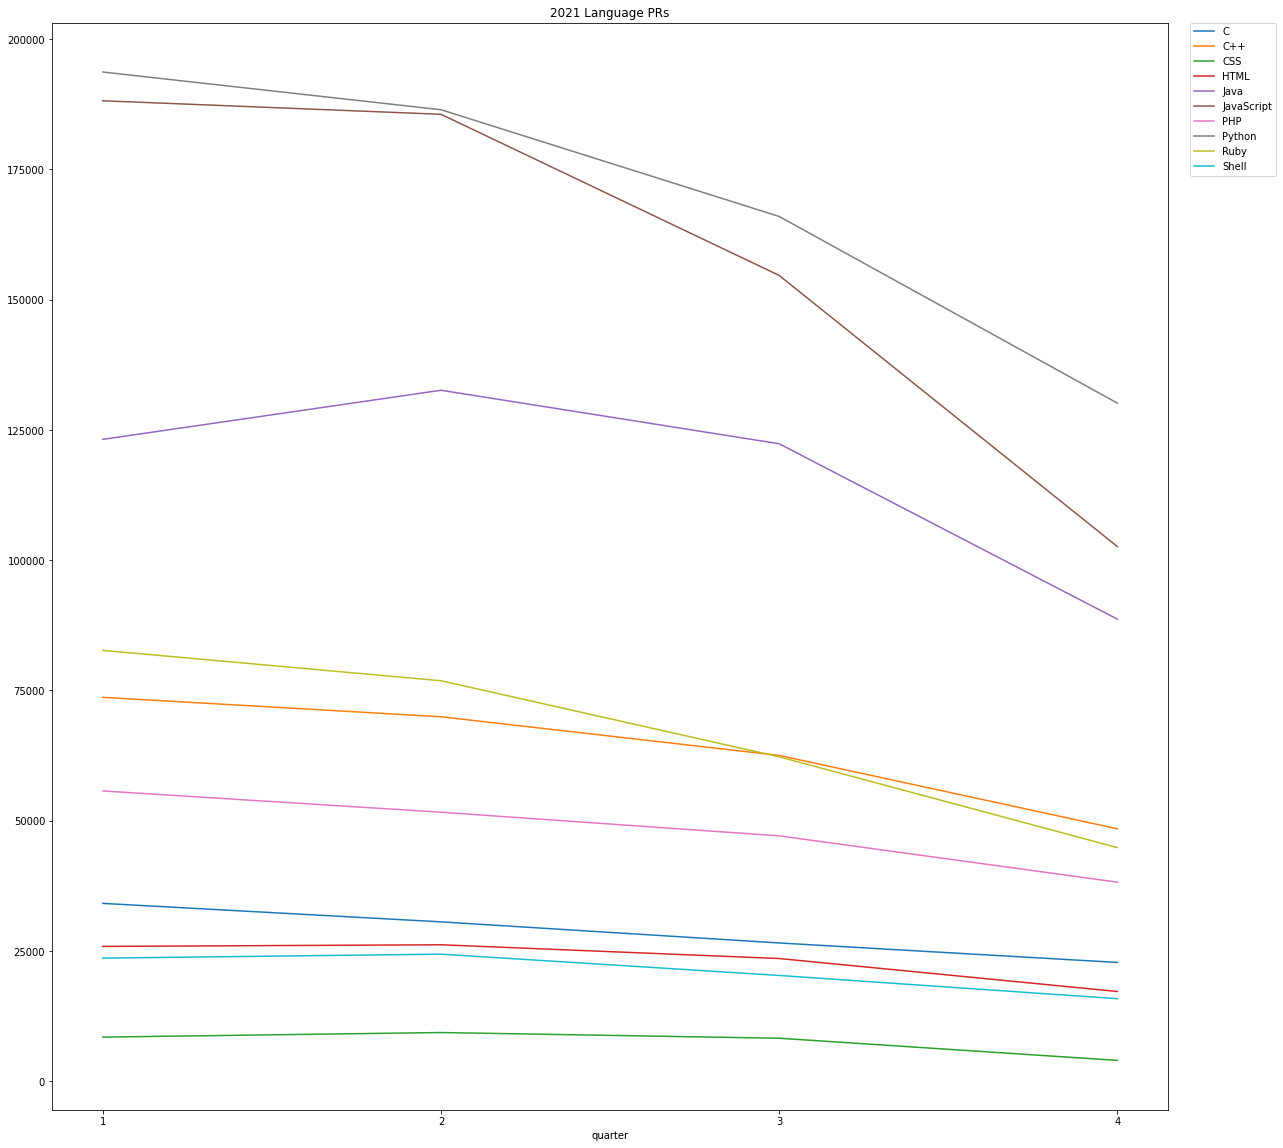

In [13]:
plt = prs_2021.plot.line(legend=True, title='2021 Language PRs', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [14]:
prs_2020 = prs_df[(prs_df['year'] == 2020) & (prs_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

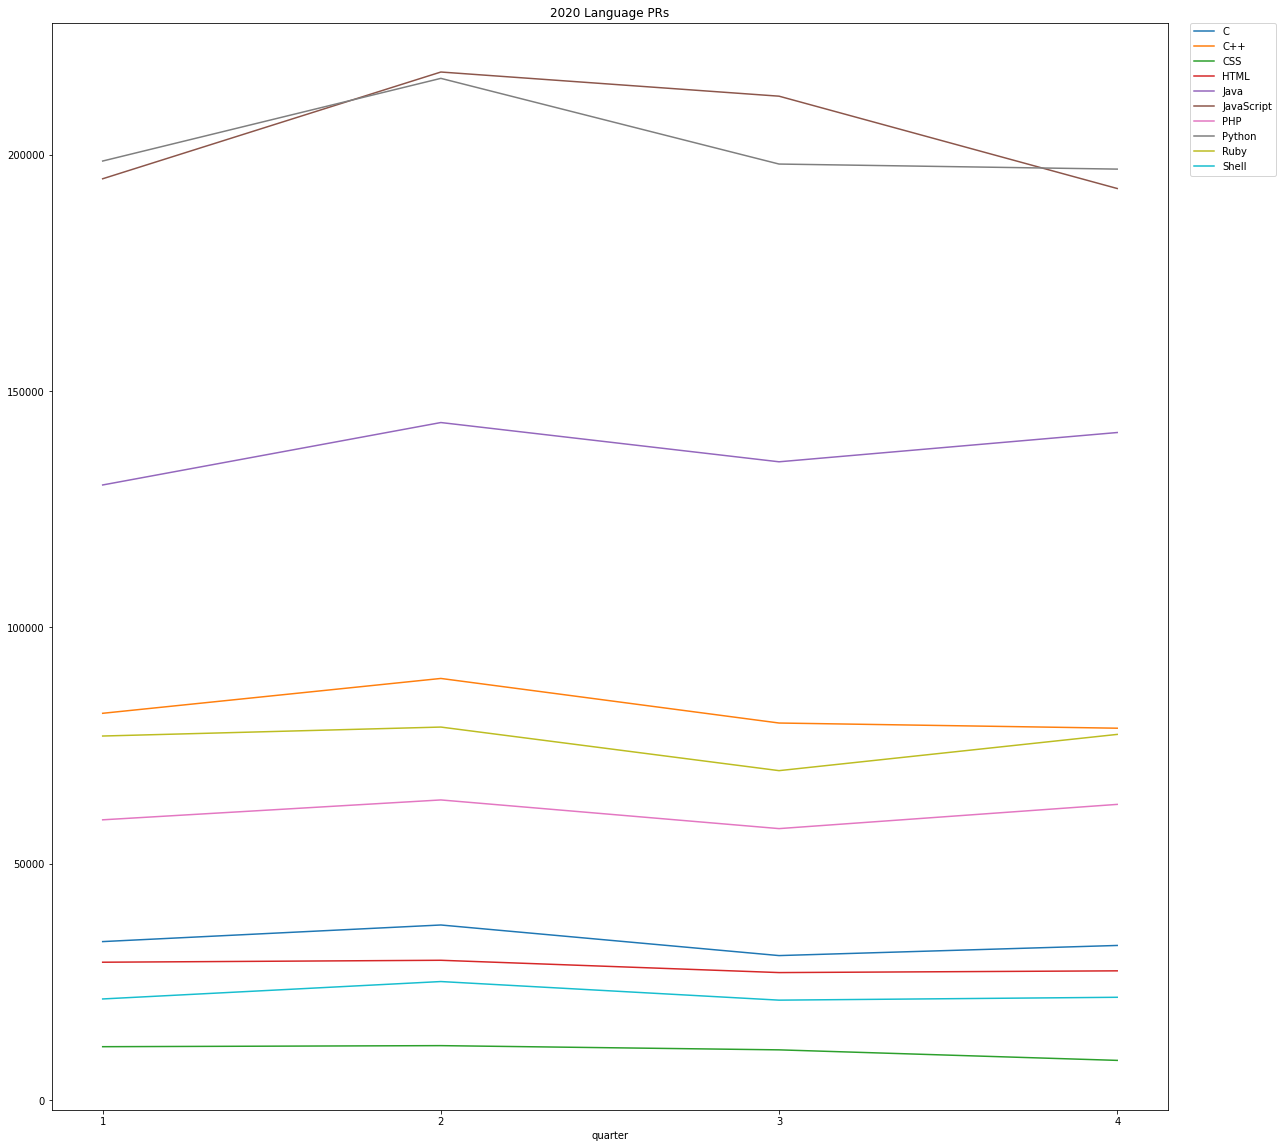

In [15]:
plt = prs_2020.plot.line(legend=True, title='2020 Language PRs', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [16]:
prs_2019 = prs_df[(prs_df['year'] == 2021) & (prs_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

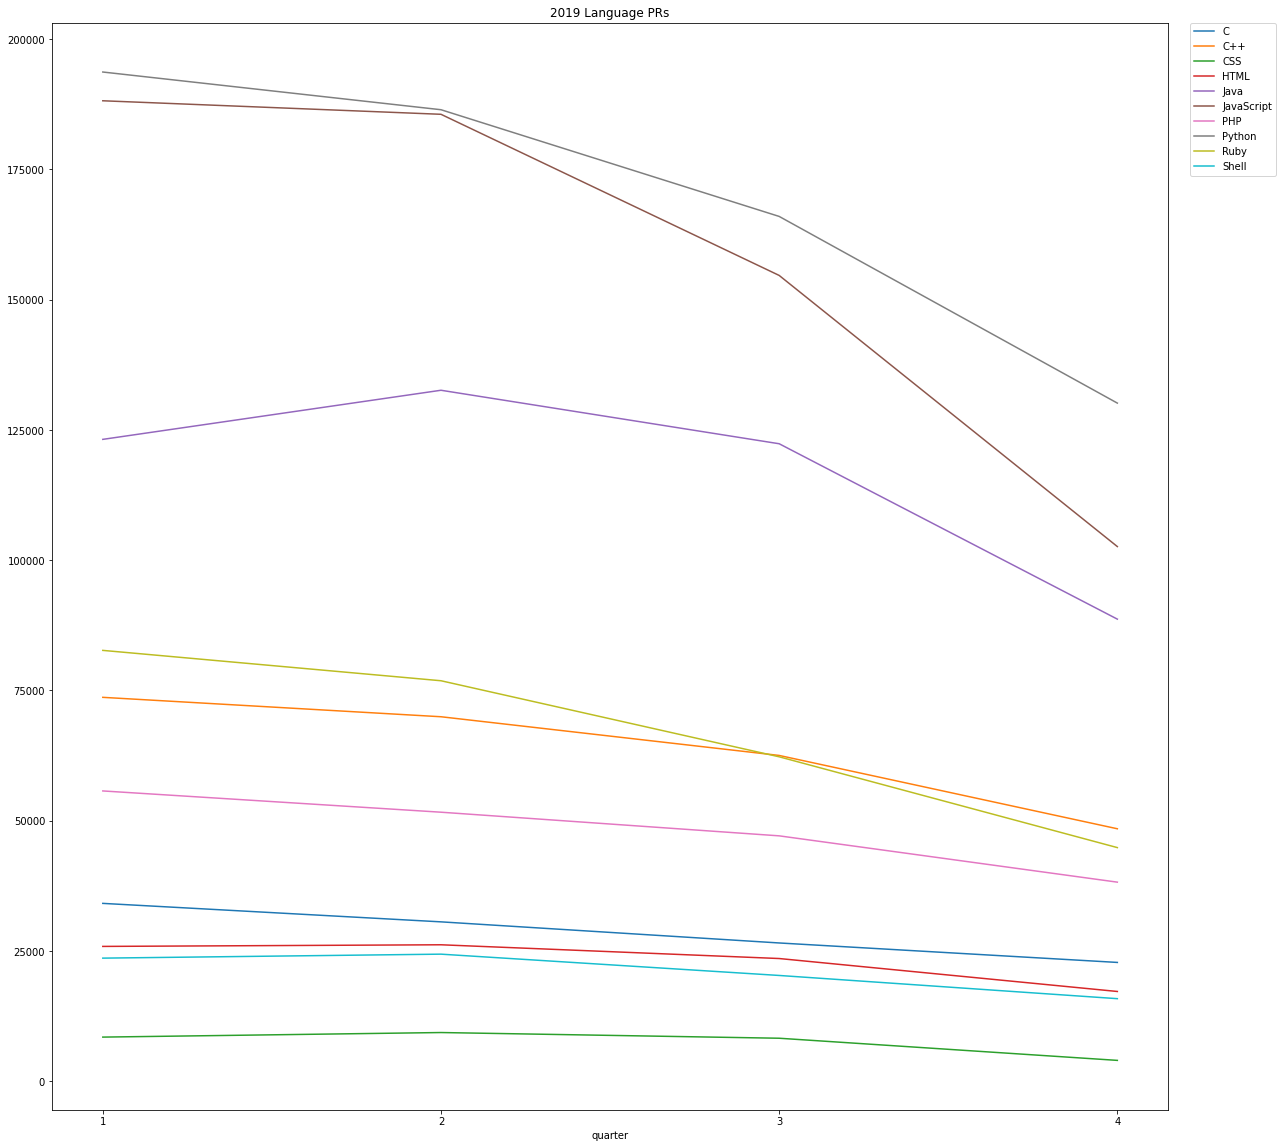

In [17]:
plt = prs_2019.plot.line(legend=True, title='2019 Language PRs', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

These above charts show an interesting trend in language usage over the years. I decided to just display the top 10 languages that are used in repositories because displaying more than that made the charts unreadable and each language seemed to have a very similar distribution. I wonder what caused the uptick in usage in the 4th quarter of 2020.

### Issues Over a Year

In [18]:
issues_2021 = issues_df[(issues_df['year'] == 2021) & (issues_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

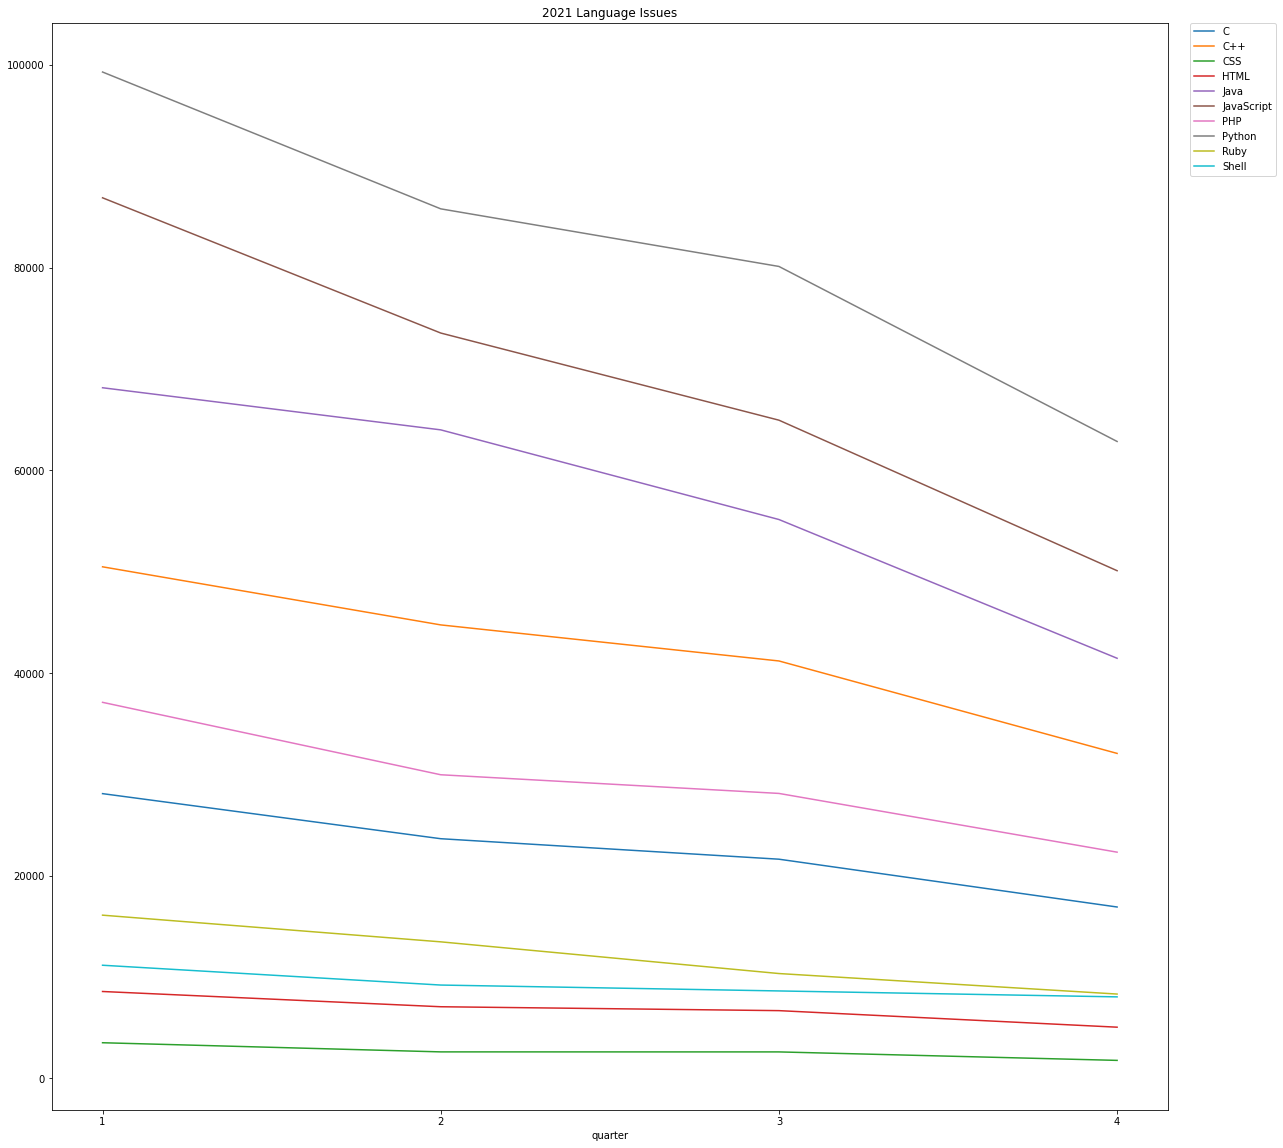

In [19]:
plt = issues_2021.plot.line(legend=True, title='2021 Language Issues', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [20]:
issues_2020 = issues_df[(issues_df['year'] == 2020) & (issues_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

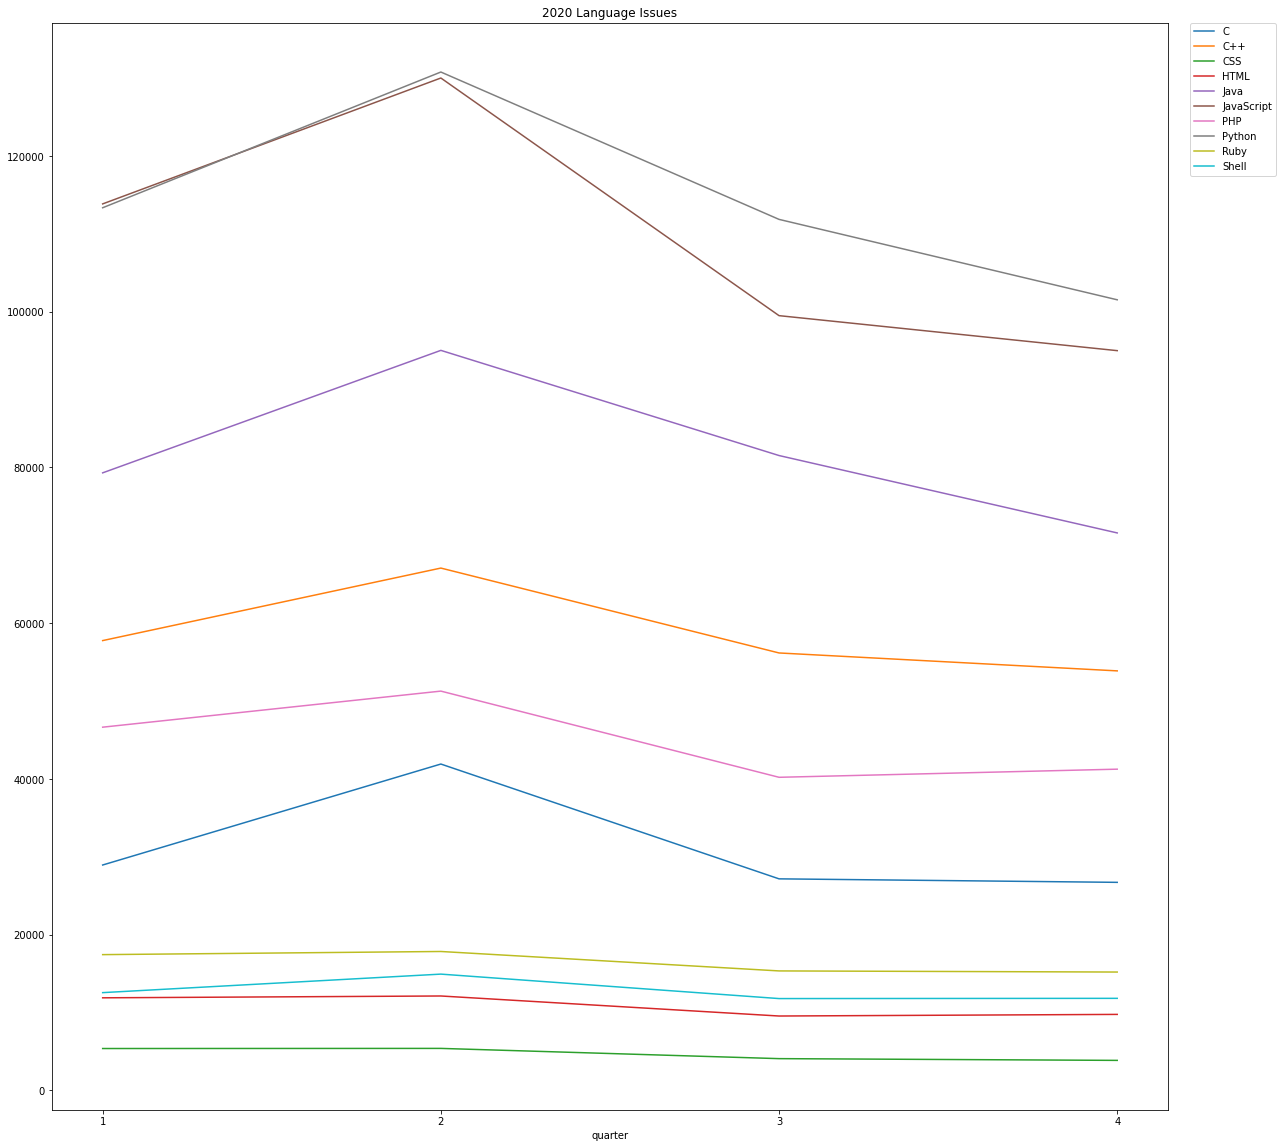

In [21]:
plt = issues_2020.plot.line(legend=True, title='2020 Language Issues', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [22]:
issues_2019 = issues_df[(issues_df['year'] == 2019) & (issues_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)

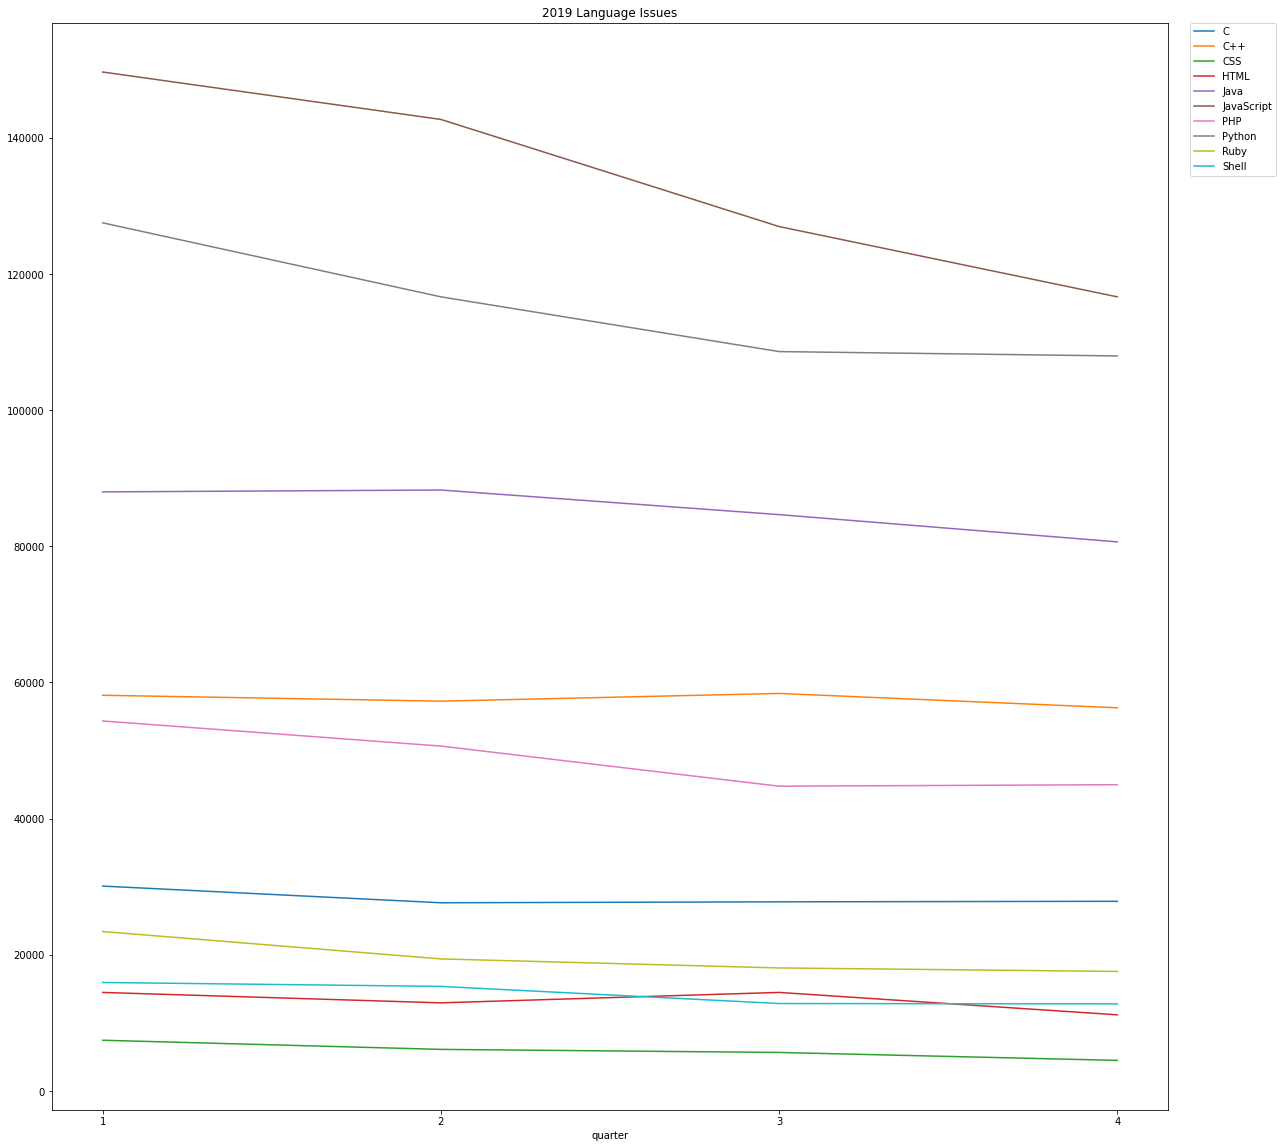

In [23]:
plt = issues_2019.plot.line(legend=True, title='2019 Language Issues', figsize=(20,20), xticks=[1,2,3,4])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

It's really intersting we don't see a similar trend between the PRs and Issues in quarter 4. 